In [179]:
library(e1071)
library(rpart)
library(klaR)
library(ggplot2)
library(dplyr)
library(GGally)
library(rpart)
library(rpart.plot)
library(randomForest)
library(mltools)
library(data.table)

In [38]:
train = read.csv('../input/titanic/train.csv', stringsAsFactor = F)
test = read.csv('../input/titanic/test.csv', stringsAsFactor = F)

In [52]:
str(train)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [53]:
colSums(train == "")

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0          NA 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           0

In [54]:
colSums(is.na(train))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [79]:
train$Cabin <- NULL

In [80]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,Q


In [43]:
train$Embarked[train$Embarked == ""] = "S"

In [55]:
t<-table(train$Embarked,train$Survived)
for (i in 1:dim(t)[1]){
    t[i,]<-t[i,]/sum(t[i,])*100
}
t

   
           0        1
  C 44.64286 55.35714
  Q 61.03896 38.96104
  S 66.09907 33.90093

In [70]:
t<-table(train$Pclass,train$Survived)
for (i in 1:dim(t)[1]){
    t[i,]<-t[i,]/sum(t[i,])*100
}
t

   
           0        1
  1 37.03704 62.96296
  2 52.71739 47.28261
  3 75.76375 24.23625

In [71]:
t<-table(train$SibSp,train$Survived)
for (i in 1:dim(t)[1]){
    t[i,]<-t[i,]/sum(t[i,])*100
}
t

   
            0         1
  0  65.46053  34.53947
  1  46.41148  53.58852
  2  53.57143  46.42857
  3  75.00000  25.00000
  4  83.33333  16.66667
  5 100.00000   0.00000
  8 100.00000   0.00000

In [72]:
t<-table(train$Parch,train$Survived)
for (i in 1:dim(t)[1]){
    t[i,]<-t[i,]/sum(t[i,])*100
}
t

   
            0         1
  0  65.63422  34.36578
  1  44.91525  55.08475
  2  50.00000  50.00000
  3  40.00000  60.00000
  4 100.00000   0.00000
  5  80.00000  20.00000
  6 100.00000   0.00000

In [105]:
hotenc = one_hot(as.data.table(train[,4]))
hotenc1 = one_hot(as.data.table(train[,9]))

In [114]:
train$Name <- NULL
train$Ticket <- NULL
train$PassengerId <- NULL

In [112]:
train$Age[is.na(train$Age)] <- mean(train$Age,na.rm = T)

In [115]:
head(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22.00000,1,0,7.2500,S
2,1,1,female,38.00000,1,0,71.2833,C
3,1,3,female,26.00000,0,0,7.9250,S
4,1,1,female,35.00000,1,0,53.1000,S
5,0,3,male,35.00000,0,0,8.0500,S
6,0,3,male,29.69912,0,0,8.4583,Q


In [130]:
sample = sample(2, 891, replace = T, prob = c(0.8, 0.2))

In [131]:
train_train = train[sample == 1, ]
train_test = train[sample == 2, ]

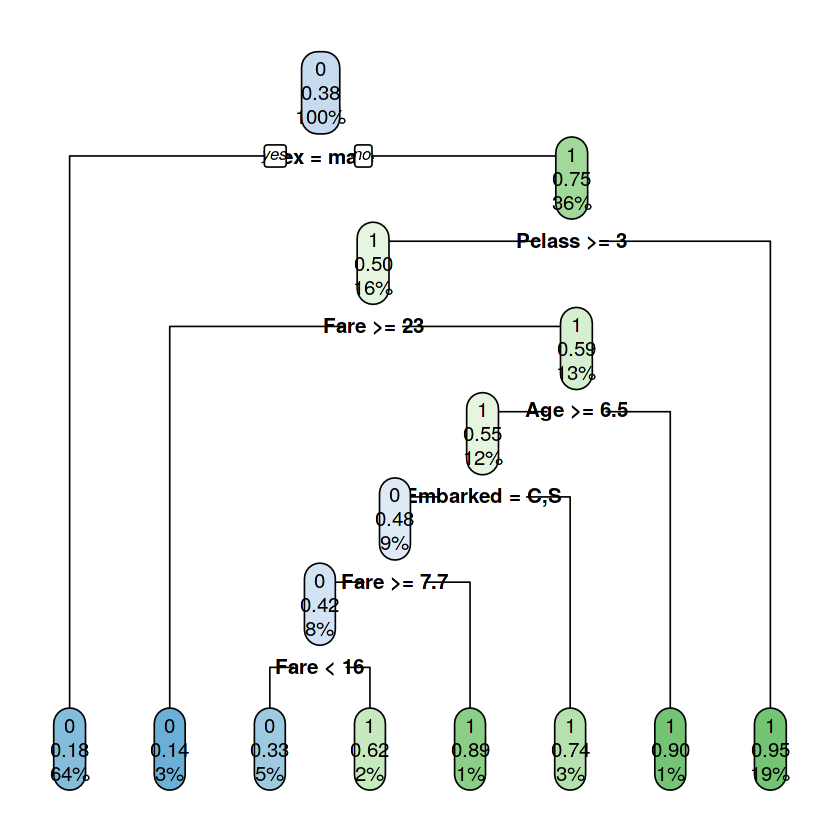

In [118]:
tree = rpart(Survived ~ . , train_train, method = 'class')
rpart.plot(tree)

In [135]:
pred = predict(tree, train_test)[1:418]
pred = ifelse(pred >= 0.5, 1,0)

t <- table(train_test$Survived, pred)

          
                    0          1
  0         93.333333   6.666667
  4.0125   100.000000   0.000000
  5        100.000000   0.000000
  6.2375   100.000000   0.000000
  6.4375   100.000000   0.000000
  6.45     100.000000   0.000000
  6.4958   100.000000   0.000000
  6.75     100.000000   0.000000
  6.8583   100.000000   0.000000
  6.95     100.000000   0.000000
  6.975     50.000000  50.000000
  7.0458   100.000000   0.000000
  7.05     100.000000   0.000000
  7.0542   100.000000   0.000000
  7.125    100.000000   0.000000
  7.1417     0.000000 100.000000
  7.225     75.000000  25.000000
  7.2292    73.333333  26.666667
  7.25      92.307692   7.692308
  7.3125   100.000000   0.000000
  7.4958    66.666667  33.333333
  7.5208   100.000000   0.000000
  7.55      75.000000  25.000000
  7.6292   100.000000   0.000000
  7.65      75.000000  25.000000
  7.725    100.000000   0.000000
  7.7292   100.000000   0.000000
  7.7333    50.000000  50.000000
  7.7375    50.000000  50.000000

In [137]:
presicion <- t[1,1]/(sum(t[1,]))
recall <- t[1,1]/(sum(t[,1]))
presicion

[1] 0.9333333

In [138]:
recall

[1] 0.006722744

In [139]:
F <- 2 * presicion * recall / (presicion + recall)
F

[1] 0.01334933

In [151]:
test_ = test
test_$PassengerId <- NULL
test_$Name <- NULL
test_$Ticket <- NULL
test_$Cabin <- NULL

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
3,male,34.5,0,0,7.8292,Q
3,female,47.0,1,0,7.0000,S
2,male,62.0,0,0,9.6875,Q
3,male,27.0,0,0,8.6625,S
3,female,22.0,1,1,12.2875,S
3,male,14.0,0,0,9.2250,S
3,female,30.0,0,0,7.6292,Q
2,male,26.0,1,1,29.0000,S
3,female,18.0,0,0,7.2292,C


In [161]:
pred_ <- predict(tree,test_,type="class")
result <- data.frame(test$PassengerId,pred_)
names(result)<-c("PassengerId","Survived")
write.csv(result,file = "sub.csv", row.names = FALSE)

In [167]:
lg <- glm(Survived ~ . ,family = binomial(link='logit'), train_train)

pred2 <- predict(lg,train_test)
pred2 <- ifelse(pred2 >= 0.5, 1, 0)

t1 <- table(pred2,train_test$Survived)
presicion1 <- t1[1,1]/(sum(t1[1,]))
recall1 <- t1[1,1]/(sum(t1[,1]))
presicion1

[1] 0.7711864

In [168]:
recall1

[1] 0.9191919

In [169]:
F1 <- 2 * presicion1 * recall1 / (presicion1 + recall1)
F1

[1] 0.8387097

In [174]:
pred_1 <- predict(lg,test_)
pred_1 <- ifelse(pred_1 > 0.5, 1, 0)
ressult <- data.frame(test$PassengerId, pred_1)
names(result) <- c("PassengerId","Survived")
write.csv(result,file="MySub.csv",row.names = FALSE)

In [ ]:
rf <- randomForest(Survived ~ . , train_train, ntree = 150)

pred3 <- predict(rf, train_test)
pred3 <- ifelse(pred3 >= 0.5, 1, 0)

t2 <- table(pred3, train_test$Survived)
presicion2 <- t2[1,1] / (sum(t2[1,]))
recall2 <- t2[1,1]/(sum(t1[,1]))
presicon2

In [ ]:
recall2

In [ ]:
F2 <- 2 * presicion2 * recall2 / (presicion2 + recall2)
F2

In [ ]:
pred_2 <- predict(rf,test_)
pred_2 <- ifelse(pred_2 > 0.5, 1, 0)
ressult <- data.frame(test$PassengerId, pred_1)
names(result) <- c("PassengerId","Survived")
write.csv(result,file = "MySubmission.csv",row.names = FALSE)